### 1. Tree를 적용한 분류 예측.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree                        # 시각화 출력 함수.
from sklearn import metrics, preprocessing
from sklearn.datasets import load_boston
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### 1.2. 데이터를 읽어온다.

In [2]:
# 이전 실습에서 전처리 해서 저장해 둔 데이터를 읽어온다.
df = pd.read_csv('data/data_titanic_2.csv', header='infer')

In [3]:
df.shape

(889, 21)

In [4]:
df.head(3)

,Embarked_Q,Embarked_S,Sex_male,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,SibSp_1,...,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Pclass_2,Pclass_3,"Age_(21.0, 30.0]","Age_(30.0, 35.0]","Age_(35.0, 80.0]",Survived
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [5]:
X = df.drop(columns=['Survived'])
Y = df.Survived

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 1.2. 분류 Tree 하이퍼 파라미터 최적화.

In [7]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(10,31)
max_leaf_nodes_grid = np.arange(2,21)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

In [8]:
gridCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs = -1)        # estimator = an instance of DecisionTreeClassifier.
gridCV.fit(X_train, Y_train);
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

In [9]:
print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))

Tree best depth : 3
Tree best min_samples_leaf : 23
Tree best max_leaf_nodes : 6


In [10]:
# 최적화된 예측.
# DTC_best = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
# DTC_best.fit(X_train, Y_train);
DTC_best = gridCV.best_estimator_                                    # 교차검증의 결과인 최적의 학습객체 사용.
Y_pred = DTC_best.predict(X_test)
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Tree best accuracy : 0.82


#### 1.3. Tree 시각화.

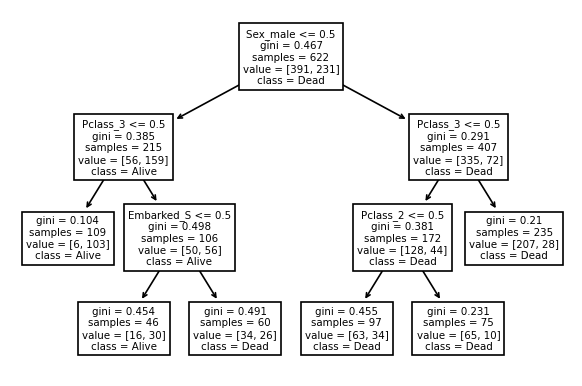

In [11]:
plt.figure(dpi=120)
plot_tree(DTC_best, feature_names = X.columns, class_names = ['Dead','Alive'])
plt.show()

### 2. Tree를 활용한 회귀.

#### 2.1. 데이터를 읽어온다.

In [12]:
data = load_boston()

In [13]:
# 데이터 설명 출력.
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [14]:
# 설명 변수.
X = data['data']
header = data['feature_names']

In [15]:
# 반응 변수.
# 주택의 중위수 가격을 나타냄.
Y = data['target']
Y = Y.reshape(-1, 1)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 2.2. 데이터를 DataFrame로 변환하고 탐색해 본다.

In [17]:
df = pd.DataFrame(np.append(X,Y,axis = 1))
df.columns = list(header)+['PRICE']

In [18]:
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [19]:
# 상관계수 행렬.
np.round(df.corr(),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


#### 2.3. 회귀 Tree 하이퍼 파라미터 최적화.

In [20]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(10,31)
max_leaf_nodes_grid = np.arange(2,21)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

In [21]:
gridCV = GridSearchCV(DecisionTreeRegressor(), parameters, cv=10, n_jobs = -1)      # estimator = an instance of DecisionTreeRegressor.
gridCV.fit(X_train, Y_train)
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

In [22]:
print("Tree best depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))

Tree best depth : 8
Tree best min_samples_leaf : 15
Tree best max_leaf_nodes : 14


In [23]:
# 최적화된 예측.
# DTR_best = DecisionTreeRegressor(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
# DTR_best.fit(X_train, Y_train)
DTR_best = gridCV.best_estimator_                                    # 교차검증의 결과인 최적의 학습객체 사용.
Y_pred = DTR_best.predict(X_test)
print( "Tree best RMSE : " + str(np.round(np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)),3)))

Tree best RMSE : 4.113


NOTE: 이전에 선형회귀로 얻은 결과 (RMSE = 5.33)와 비교해 본다.

#### 2.4. Tree 시각화.

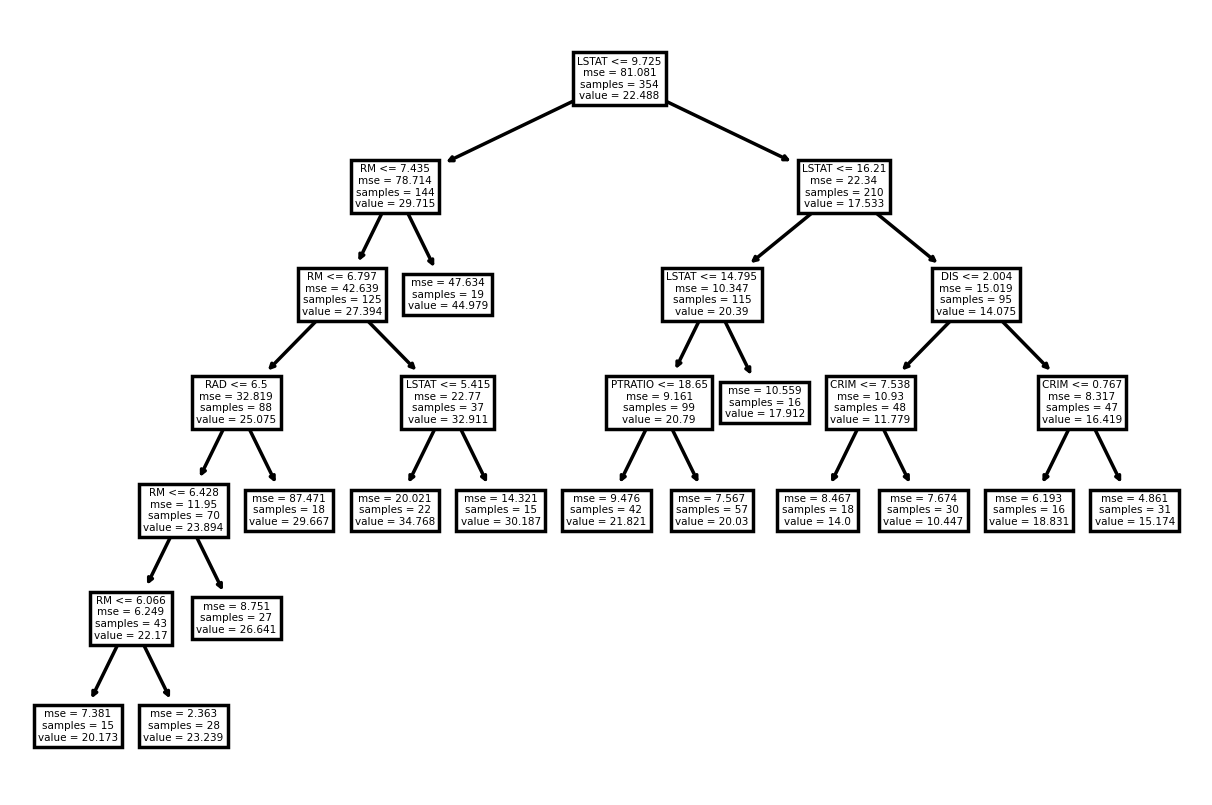

In [24]:
plt.figure(dpi=250)
plot_tree(DTR_best, feature_names = data['feature_names'])
plt.show()